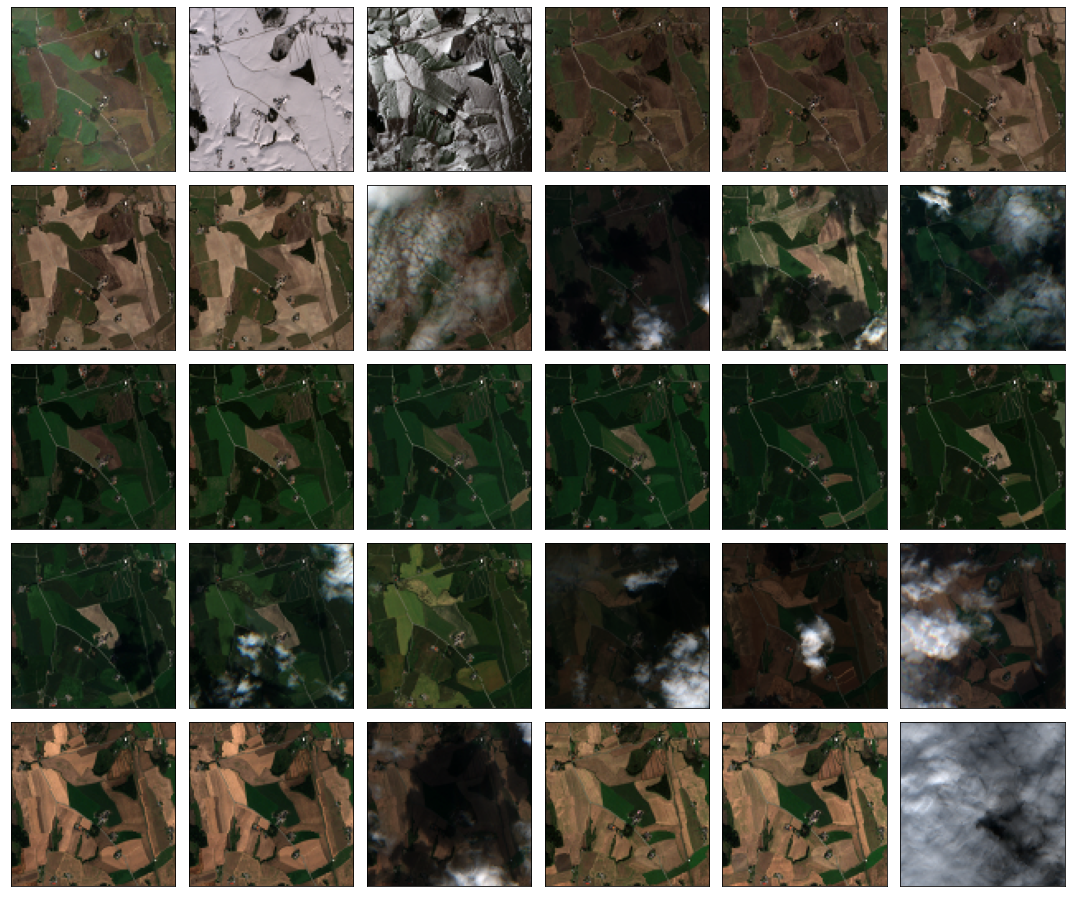

In [1]:
from src.satellite_images.satellite_images import get_images_by_orgnr
import matplotlib.pyplot as plt
from src.utils import to_rgb
import h5py

def apply_small_mask_to_image_series(mask, image_series):
    return image_series * mask.reshape(1, 16, 16, 1)


# ------------------------- Plotting all 30 100x100 raw satellite images ---------------------------

MASTER_ORGNR = "869728462"
MASTER_YEAR = "2019"

RAW_BIG_IMAGES = get_images_by_orgnr(MASTER_ORGNR)[MASTER_YEAR]


fig = plt.figure(figsize=(15, 15))

for i in range(30):
    fig.add_subplot(6, 6, (i+1))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(to_rgb(RAW_BIG_IMAGES[i]))


fig.tight_layout()
plt.show()

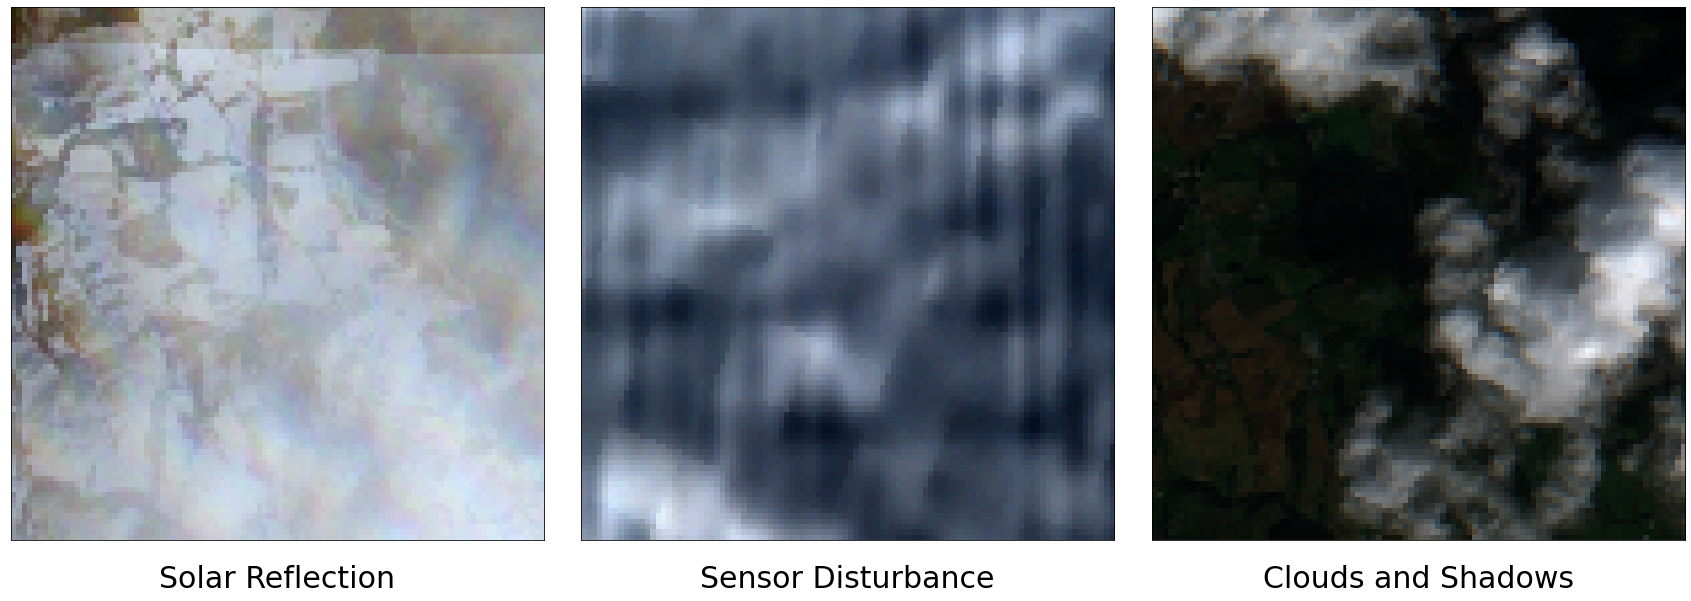

In [30]:
# ------------------ Plotting ugly images --------------------------------

# Ugly images = 869115452, 869672122, 869691712
ugly_orgnr = "869115452"
ugly_images = get_images_by_orgnr(ugly_orgnr)["2017"]
ugly_images_numbers = [1, 5, 23]

# fig = plt.figure(figsize=(15, 15))
_, axs = plt.subplots(1, len(ugly_images_numbers), figsize=(30, 30))

for i in range(len(ugly_images_numbers)):
    axs[i].imshow(to_rgb(ugly_images[ugly_images_numbers[i]]))
    axs[i].set_xticks([])
    axs[i].set_yticks([])

names = ["Solar Reflection", "Sensor Disturbance", "Clouds and Shadows"]
for ax, name in zip(axs.flat, names):
    ax.set_xlabel(f"{name}", fontsize=30, labelpad=25)

plt.subplots_adjust(wspace=0.07, hspace=0)
fig.tight_layout()
plt.show()



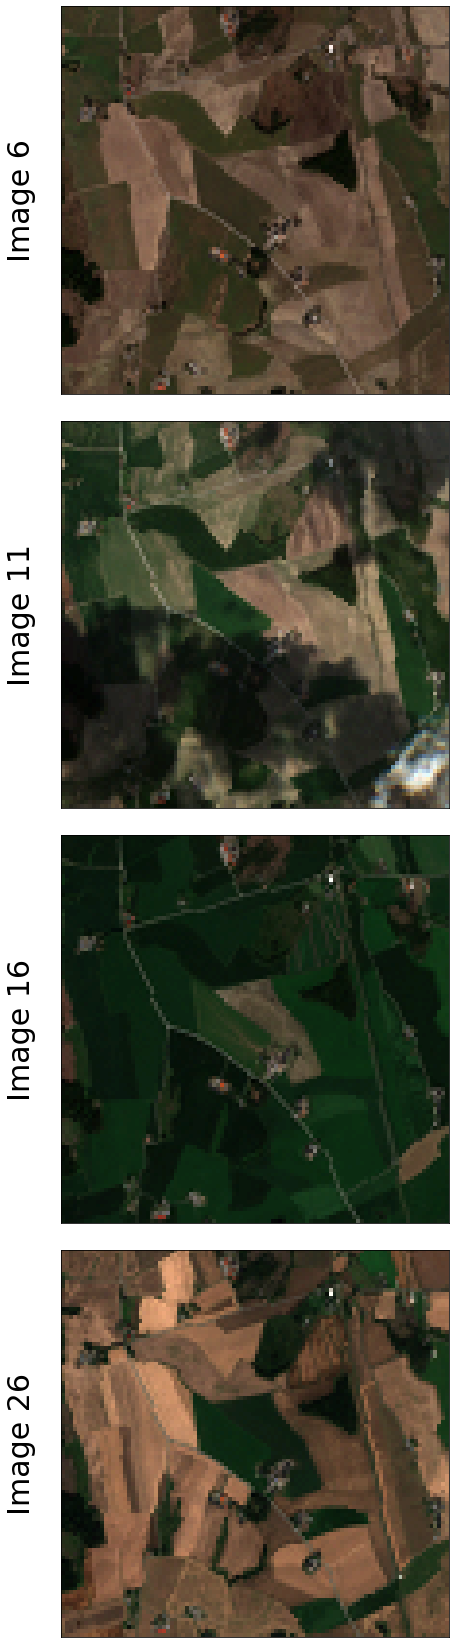

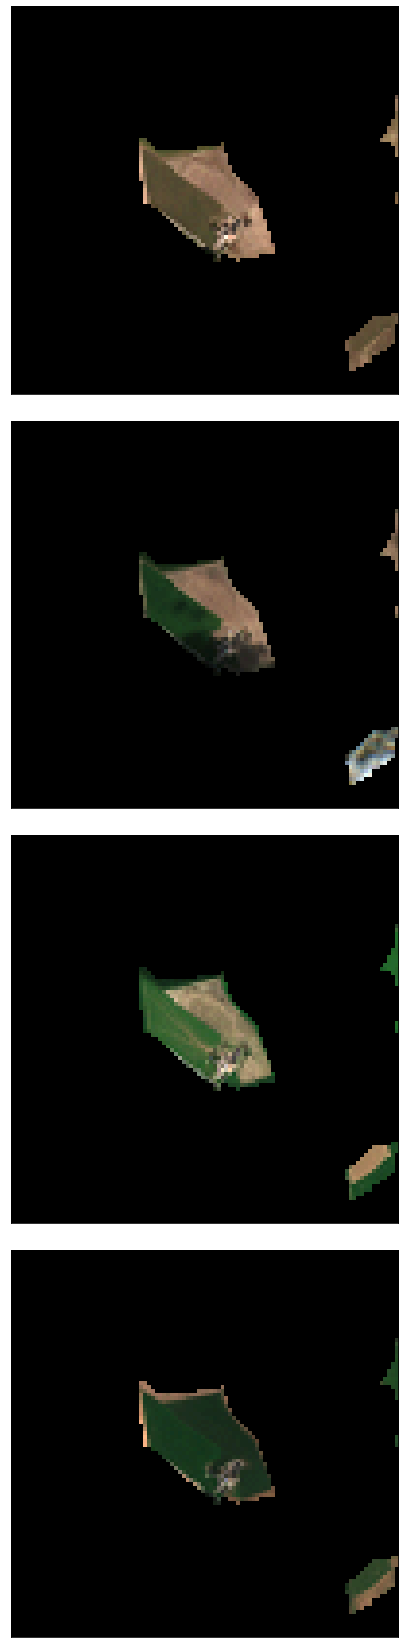

In [11]:
# ------------------ Plotting four images of a farm with mask applied ----------------------


from kornmo.mask.mask_dataset import MaskDataset
from kornmo.mask.utils import apply_mask_to_image_series

large_mask_dataset = MaskDataset('E:/MasterThesisData/data/masks/nibio_disposed_properties_masks.h5')
large_mask = large_mask_dataset.get_mask(MASTER_ORGNR, MASTER_YEAR)
RAW_BIG_IMAGES_masked = apply_mask_to_image_series(large_mask, RAW_BIG_IMAGES)


name_number = 0
temporal_names = ["Image 6", "Image 11", "Image 16", "Image 26"]

# for i in [5, 10, 15, 25]:

_, axs = plt.subplots(4, 1, figsize=(30, 30))
axs[0].imshow(to_rgb(RAW_BIG_IMAGES[5]))
axs[1].imshow(to_rgb(RAW_BIG_IMAGES[10]))
axs[2].imshow(to_rgb(RAW_BIG_IMAGES[15]))
axs[3].imshow(to_rgb(RAW_BIG_IMAGES[25]))

for ax, name in zip(axs.flat, temporal_names):
    ax.set_ylabel(f"{name}", fontsize=30, labelpad=25)

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.subplots_adjust(wspace=0, hspace=0.07)
fig.tight_layout()
plt.show()



_, axs = plt.subplots(4, 1, figsize=(30, 30))
axs[0].imshow(to_rgb(RAW_BIG_IMAGES_masked[5]))
axs[1].imshow(to_rgb(RAW_BIG_IMAGES_masked[10]))
axs[2].imshow(to_rgb(RAW_BIG_IMAGES_masked[15]))
axs[3].imshow(to_rgb(RAW_BIG_IMAGES_masked[25]))

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.subplots_adjust(wspace=0, hspace=0.07)
fig.tight_layout()
plt.show()



name_number = name_number + 1


86972846212


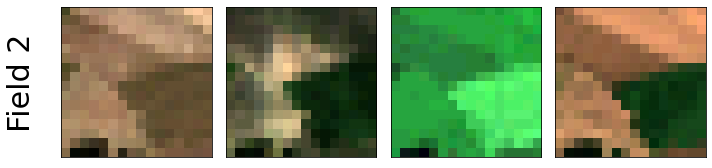

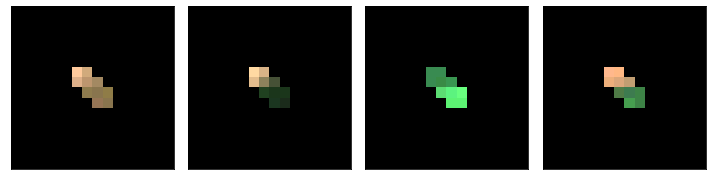

86972846213


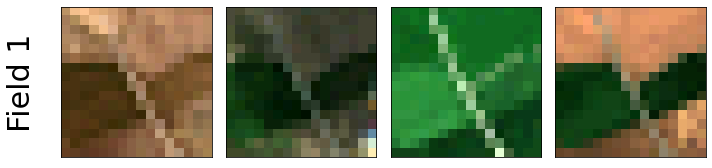

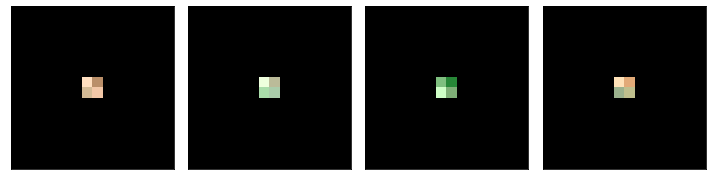

86972846214


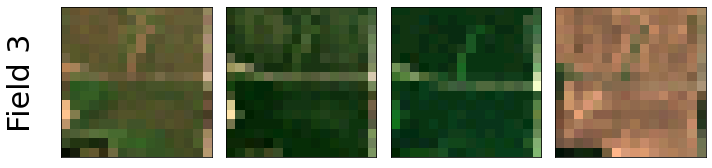

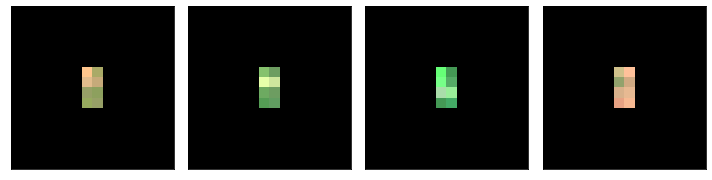

8697284627


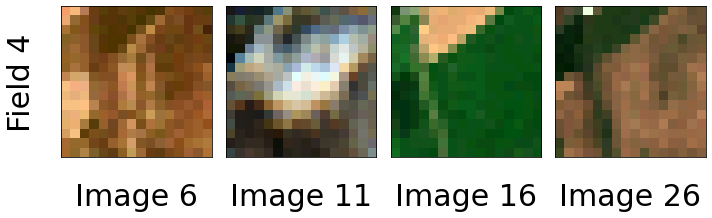

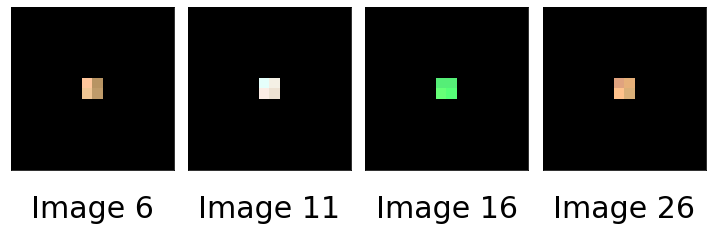

In [3]:
# ---------------- Plotting four 16x16 fields with or without masks -------------------



small_mask_dataset = MaskDataset('E:/MasterThesisData/data/masks/field_based_masks_16x16.h5')

with h5py.File('E:/MasterThesisData/data/sentinelhub/field_based_images/field_based_satellite_images_16x16.h5', "r") as f:

    all_images = f['images']

    for _, orgnum in enumerate(all_images.keys()):
        # if orgnum == "86972846212" or orgnum == "86972846213":
        if orgnum == "8697284627" or orgnum == "86972846212" or orgnum == "86972846213" or orgnum == "86972846214":

            # ---------------------- Plotting four 16x16 fields without masks --------------------

            print(orgnum)
            RAW_SMALL_IMAGES = all_images[orgnum][str(MASTER_YEAR)]

            fig, axs = plt.subplots(1, 4, figsize=(10, 26))

            axs[0].imshow(to_rgb(RAW_SMALL_IMAGES[5]), cmap='gray')
            axs[1].imshow(to_rgb(RAW_SMALL_IMAGES[10]), cmap='gray')
            axs[2].imshow(to_rgb(RAW_SMALL_IMAGES[15]), cmap='gray')
            axs[3].imshow(to_rgb(RAW_SMALL_IMAGES[25]), cmap='gray')

            if orgnum == "86972846213":
                label_name = "Field 1"
            elif orgnum == "86972846212":
                label_name = "Field 2"
            elif orgnum == "86972846214":
                label_name = "Field 3"
            else:
                label_name = "Field 4"

            axs[0].set_ylabel(f"{label_name}", fontsize=30, labelpad=25)

            temporal_names = ["Image 6", "Image 11", "Image 16", "Image 26"]

            if orgnum == "8697284627":
                for ax, name in zip(axs.flat, temporal_names):
                    ax.set_xlabel(name, fontsize=30, labelpad=25)

            for ax in axs.flat:
                ax.set_xticks([])
                ax.set_yticks([])

            plt.subplots_adjust(wspace=0, hspace=0)

            fig.tight_layout()
            plt.show()


            # ---------------------- Plotting four 16x16 fields with masks --------------------

            small_mask = small_mask_dataset.get_mask(orgnum, MASTER_YEAR)
            RAW_SMALL_IMAGES_masked = apply_small_mask_to_image_series(small_mask, RAW_SMALL_IMAGES)

            fig, axs = plt.subplots(1, 4, figsize=(10, 26))

            axs[0].imshow(to_rgb(RAW_SMALL_IMAGES_masked[5]), cmap='gray')
            axs[1].imshow(to_rgb(RAW_SMALL_IMAGES_masked[10]), cmap='gray')
            axs[2].imshow(to_rgb(RAW_SMALL_IMAGES_masked[15]), cmap='gray')
            axs[3].imshow(to_rgb(RAW_SMALL_IMAGES_masked[25]), cmap='gray')

            temporal_names = ["Image 6", "Image 11", "Image 16", "Image 26"]

            if orgnum == "8697284627":
                for ax, name in zip(axs.flat, temporal_names):
                    ax.set_xlabel(name, fontsize=30, labelpad=25)

            for ax in axs.flat:
                ax.set_xticks([])
                ax.set_yticks([])

            plt.subplots_adjust(wspace=0, hspace=0)

            fig.tight_layout()
            plt.show()



In [4]:

from kornmo.sentinel.storage import SentinelDataset

all_vegetation_indices = SentinelDataset("E:/MasterThesisData/data/sentinelhub/farm_based_images/farm_based_vegetation_indices_100x100.h5", create_if_missing=False)
vegetation_indices = all_vegetation_indices.get_images(MASTER_ORGNR, MASTER_YEAR)


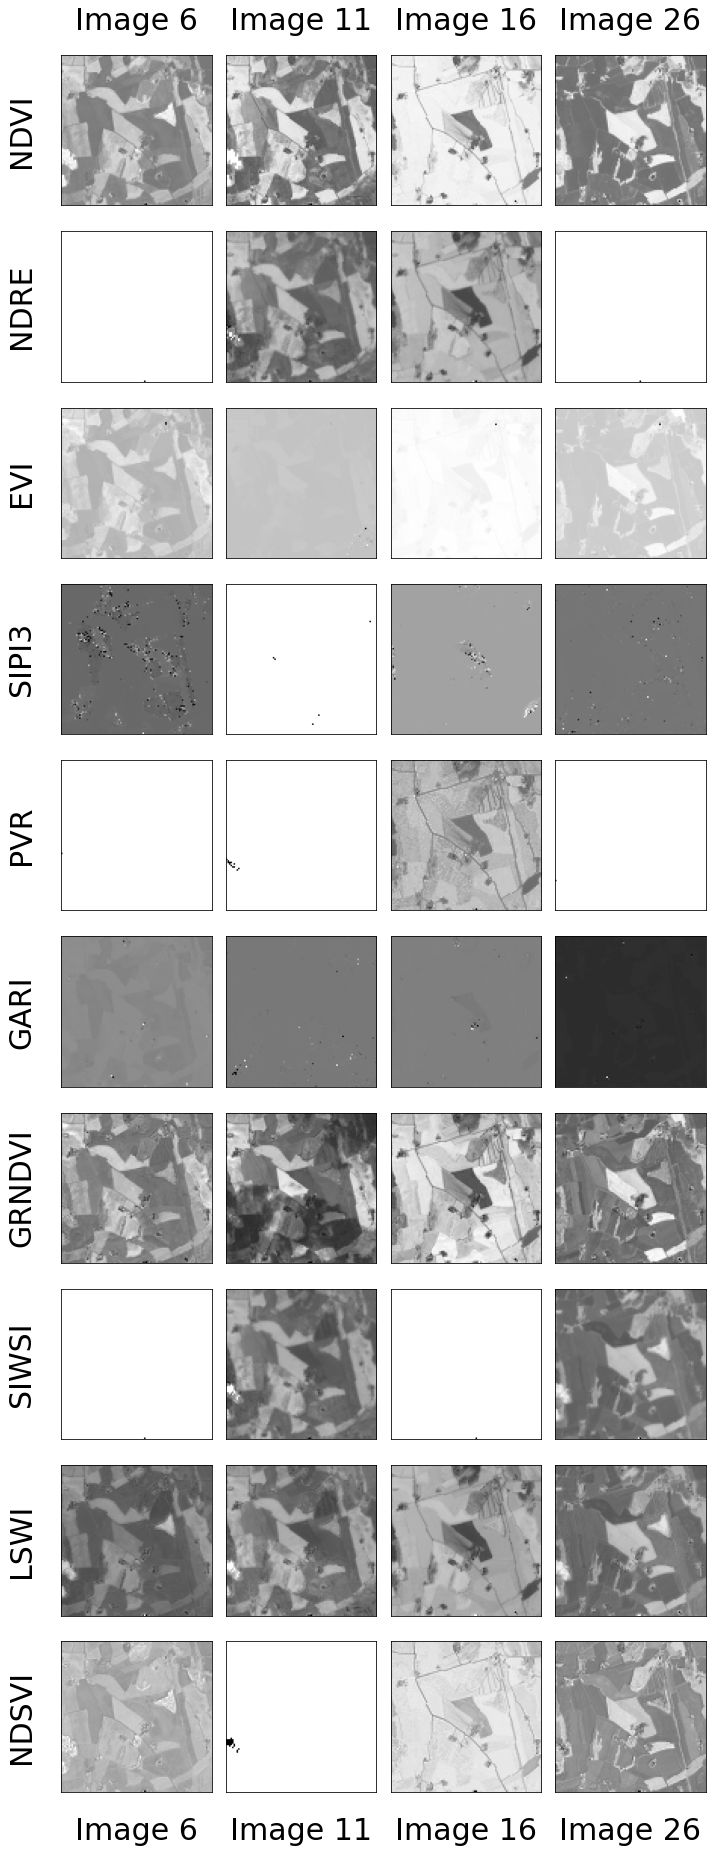

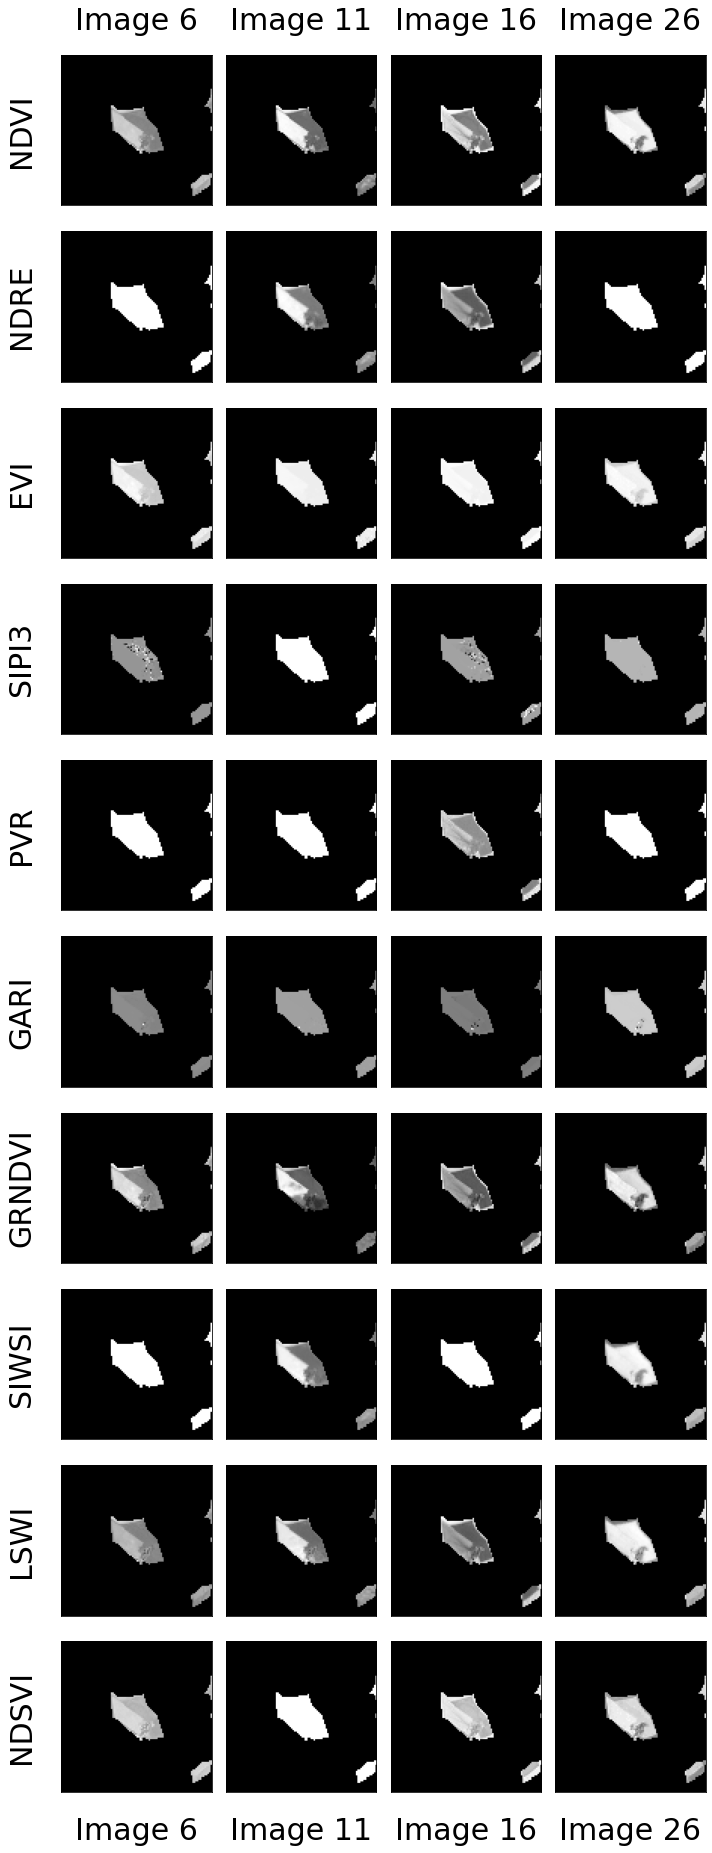

In [5]:
# --------------------------- Plotting four images of each of the ten 100 x 100 vegetation indices ------------------------

from src.utils import normalize_2d_img



fig, axs = plt.subplots(10, 4, figsize=(10, 26))

for i in range(10):
    axs[i, 0].imshow(normalize_2d_img(vegetation_indices[5, :, :, i], 1), cmap='gray')
    axs[i, 1].imshow(normalize_2d_img(vegetation_indices[10, :, :, i], 1), cmap='gray')
    axs[i, 2].imshow(normalize_2d_img(vegetation_indices[15, :, :, i], 1), cmap='gray')
    axs[i, 3].imshow(normalize_2d_img(vegetation_indices[25, :, :, i], 1), cmap='gray')
    # axs[0, 0].set_title('Axis [0, 0]')

vegetation_names = ["NDVI", "NDRE", "EVI", "SIPI3", "PVR", "GARI", "GRNDVI", "SIWSI", "LSWI", "NDSVI"]

for ax, name in zip(axs[:, 0].flat, vegetation_names):
    ax.set_ylabel(name, fontsize=30, labelpad=25)

temporal_names = ["Image 6", "Image 11", "Image 16", "Image 26"]

for ax, name in zip(axs[9, :].flat, temporal_names):
    ax.set_xlabel(name, fontsize=30, labelpad=25)

for ax, name in zip(axs[0, :].flat, temporal_names):
    ax.set_xlabel(name, fontsize=30, labelpad=25)
    ax.xaxis.set_label_position('top')

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.subplots_adjust(wspace=0, hspace=0)
fig.tight_layout()
plt.show()



# --------------------------- Plotting four images of each of the ten 100 x 100 vegetation indices with masks applied ------------------------

fig, axs = plt.subplots(10, 4, figsize=(10, 26))

for i in range(10):
    axs[i, 0].imshow(large_mask * normalize_2d_img(vegetation_indices[5, :, :, i], 1), cmap='gray')
    axs[i, 1].imshow(large_mask * normalize_2d_img(vegetation_indices[10, :, :, i], 1), cmap='gray')
    axs[i, 2].imshow(large_mask * normalize_2d_img(vegetation_indices[15, :, :, i], 1), cmap='gray')
    axs[i, 3].imshow(large_mask * normalize_2d_img(vegetation_indices[25, :, :, i], 1), cmap='gray')

vegetation_names = ["NDVI", "NDRE", "EVI", "SIPI3", "PVR", "GARI", "GRNDVI", "SIWSI", "LSWI", "NDSVI"]

for ax, name in zip(axs[:, 0].flat, vegetation_names):
    ax.set_ylabel(name, fontsize=30, labelpad=25)

temporal_names = ["Image 6", "Image 11", "Image 16", "Image 26"]

for ax, name in zip(axs[9, :].flat, temporal_names):
    ax.set_xlabel(name, fontsize=30, labelpad=25)

for ax, name in zip(axs[0, :].flat, temporal_names):
    ax.set_xlabel(name, fontsize=30, labelpad=25)
    ax.xaxis.set_label_position('top')

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.subplots_adjust(wspace=0, hspace=0)
fig.tight_layout()
plt.show()


86972846212


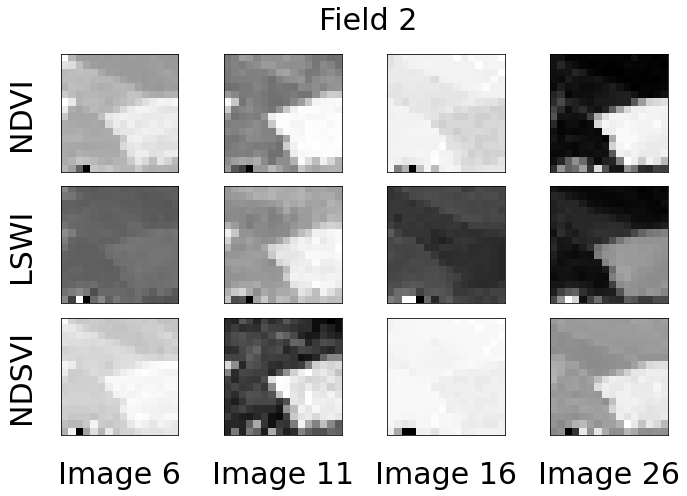

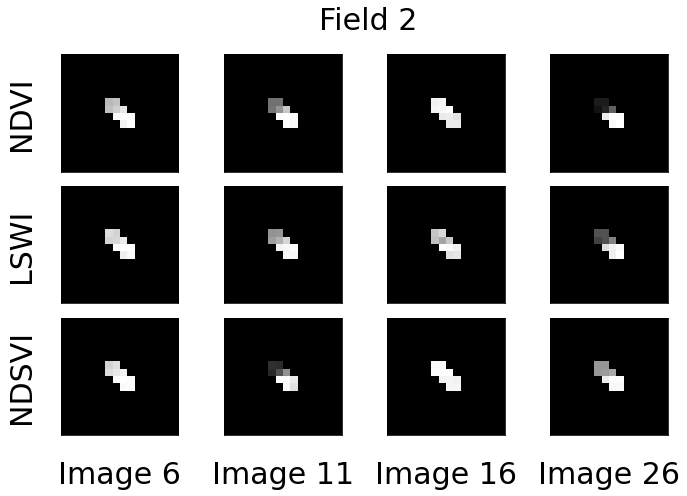

86972846213


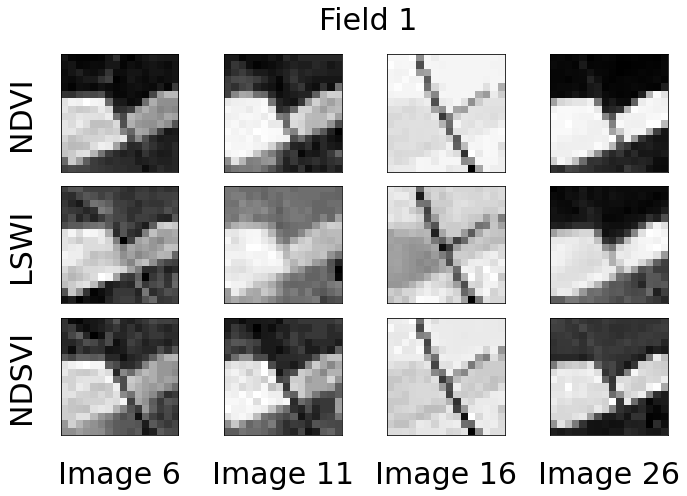

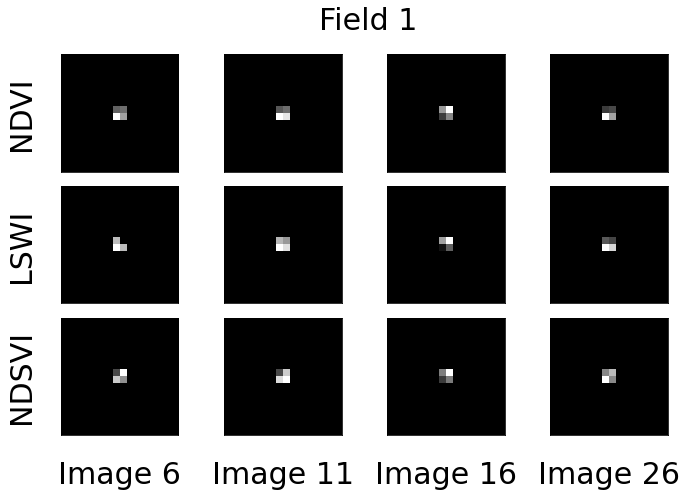

In [7]:


from src.utils import normalize_2d_img


# small_mask_dataset = MaskDataset('E:/MasterThesisData/data/masks/field_based_masks_16x16.h5')

with h5py.File('E:/MasterThesisData/data/sentinelhub/field_based_images/field_based_vegetation_indices_16x16.h5', "r") as f:

    all_images = f['images']

    for _, orgnum in enumerate(all_images.keys()):
        if orgnum == "86972846212" or orgnum == "86972846213":
            print(orgnum)
            VEGETATION_SMALL_IMAGES = all_images[orgnum][str(MASTER_YEAR)]

            small_mask = small_mask_dataset.get_mask(orgnum, MASTER_YEAR)

            fig, axs = plt.subplots(3, 4, figsize=(10, 7))
            axis_num = 0

                    # NDVI, LSWI, NDSVI
            for i in [0, 8, 9]:

                axs[axis_num, 0].imshow(normalize_2d_img(VEGETATION_SMALL_IMAGES[5, :, :, i], 1), cmap='gray')
                axs[axis_num, 1].imshow(normalize_2d_img(VEGETATION_SMALL_IMAGES[10, :, :, i], 1), cmap='gray')
                axs[axis_num, 2].imshow(normalize_2d_img(VEGETATION_SMALL_IMAGES[15, :, :, i], 1), cmap='gray')
                axs[axis_num, 3].imshow(normalize_2d_img(VEGETATION_SMALL_IMAGES[25, :, :, i], 1), cmap='gray')

                axis_num = axis_num + 1


            vegetation_names = ["NDVI", "LSWI", "NDSVI"]

            for ax, name in zip(axs[:, 0].flat, vegetation_names):
                ax.set_ylabel(name, fontsize=30, labelpad=25)


            temporal_names = ["Image 6", "Image 11", "Image 16", "Image 26"]

            for ax, name in zip(axs[2, :].flat, temporal_names):
                ax.set_xlabel(name, fontsize=30, labelpad=25)

            # for ax, name in zip(axs[0, :].flat, temporal_names):
            if orgnum == "86972846213":
                label_name = "Field 1"
            else:
                label_name = "Field 2"

            axs[0, 1].set_xlabel(f"                  {label_name}", fontsize=30, labelpad=25)
            axs[0, 1].xaxis.set_label_position('top')

            # Hide x labels and tick labels for top plots and y ticks for right plots.
            for ax in axs.flat:
                ax.set_xticks([])
                ax.set_yticks([])

            plt.subplots_adjust(wspace=0, hspace=0)

            fig.tight_layout()
            plt.show()


            axis_num = 0
            fig, axs = plt.subplots(3, 4, figsize=(10, 7))

                                # NDVI, LSWI, NDSVI
            for i in [0, 8, 9]:

                axs[axis_num, 0].imshow(small_mask * normalize_2d_img(VEGETATION_SMALL_IMAGES[5, :, :, i], 1), cmap='gray')
                axs[axis_num, 1].imshow(small_mask * normalize_2d_img(VEGETATION_SMALL_IMAGES[10, :, :, i], 1), cmap='gray')
                axs[axis_num, 2].imshow(small_mask * normalize_2d_img(VEGETATION_SMALL_IMAGES[15, :, :, i], 1), cmap='gray')
                axs[axis_num, 3].imshow(small_mask * normalize_2d_img(VEGETATION_SMALL_IMAGES[25, :, :, i], 1), cmap='gray')

                axis_num = axis_num + 1


            vegetation_names = ["NDVI", "LSWI", "NDSVI"]

            for ax, name in zip(axs[:, 0].flat, vegetation_names):
                ax.set_ylabel(name, fontsize=30, labelpad=25)


            temporal_names = ["Image 6", "Image 11", "Image 16", "Image 26"]

            for ax, name in zip(axs[2, :].flat, temporal_names):
                ax.set_xlabel(name, fontsize=30, labelpad=25)

            # for ax, name in zip(axs[0, :].flat, temporal_names):
            if orgnum == "86972846213":
                label_name = "Field 1"
            else:
                label_name = "Field 2"

            axs[0, 1].set_xlabel(f"                  {label_name}", fontsize=30, labelpad=25)
            axs[0, 1].xaxis.set_label_position('top')

            # Hide x labels and tick labels for top plots and y ticks for right plots.
            for ax in axs.flat:
                # ax.label_outer()
                ax.set_xticks([])
                ax.set_yticks([])

            plt.subplots_adjust(wspace=0, hspace=0)

            fig.tight_layout()
            plt.show()
